# Day 29

### Gini index (Decision Tree Classifier)

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn import tree

In [18]:
df = pd.read_csv('Dataset/weather_data.csv')
df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [19]:
#Encode categorical features(convert categorical features into numerical features)
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [20]:
#features and target
x =df.drop('Play',axis=1)
y = df['Play']
print('x:\n',x) #x
print('\n\ny:\n',y) #y


x:
     Outlook  Temperature  Humidity  Windy
0         2            1         0      0
1         2            1         0      1
2         0            1         0      0
3         1            2         0      0
4         1            0         1      0
5         1            0         1      1
6         0            0         1      1
7         2            2         0      0
8         2            0         1      0
9         1            2         1      0
10        2            2         1      1
11        0            2         0      1
12        0            1         1      0
13        1            2         0      1


y:
 0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int32


In [21]:
clf = DecisionTreeClassifier(criterion='gini',random_state=42)
clf.fit(x,y)

DecisionTreeClassifier(random_state=42)

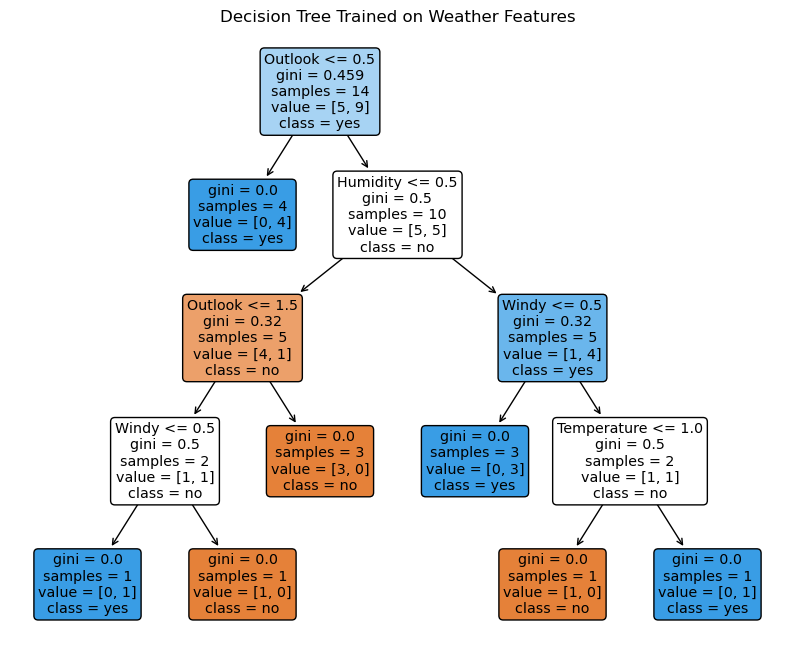

In [22]:
plt.figure(figsize=(10,8))
tree.plot_tree(clf,feature_names=x.columns.tolist(),class_names=['no','yes'],filled=True,rounded=True)
plt.title('Decision Tree Trained on Weather Features')
plt.show()  

In [23]:
#Gini Index of first split
a = 1-((9/14)**2+(5/14)**2) 
a

0.4591836734693877

In [24]:
new_sample = pd.DataFrame([{
    'Humidity':0,
    'Temperature':1,
    'Outlook':0,
    'Windy':0
}])

#apply the same onehot encoding as the training data
sample_encoded = pd.get_dummies(new_sample)
print(sample_encoded)

#align the columns with the training data
sample_encoded = sample_encoded.reindex(columns=x.columns, fill_value=0)
print(sample_encoded)

#predict
prediction = clf.predict(sample_encoded)
print(f"prediction is:","Yes " if prediction[0] == 1 else "No")

   Humidity  Temperature  Outlook  Windy
0         0            1        0      0
   Outlook  Temperature  Humidity  Windy
0        0            1         0      0
prediction is: Yes 
